<a href="https://colab.research.google.com/github/harshini3806-lang/Plant_Village_Dataset/blob/main/ResNet50V2(93_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing libraries

To begin with, we need to import several libraries to enable us to perform various tasks related to data visualization, image processing, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import os

## loading the dataset

In [2]:
train_root=r"/content/drive/MyDrive/Harshi Datasets/Original Data/train"
test_root=r"/content/drive/MyDrive/Harshi Datasets/Original Data/test"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
grapes_train=os.listdir(train_root)
grapes_train

['Healthy', 'Black Rot', 'ESCA', 'Leaf Blight']

## Creation of dataframe
**sorting and shuffling the created dataframe individually**

### **train images**

In [5]:
images_train=[]
y_train=[]
for grape in os.listdir(train_root):
    directory = train_root + "/" + grape + "/"
    print(directory)
    for image in os.listdir(directory):
        images_train.append(directory + image)
        y_train.append(grape)

/content/drive/MyDrive/Harshi Datasets/Original Data/train/Healthy/
/content/drive/MyDrive/Harshi Datasets/Original Data/train/Black Rot/
/content/drive/MyDrive/Harshi Datasets/Original Data/train/ESCA/
/content/drive/MyDrive/Harshi Datasets/Original Data/train/Leaf Blight/


In [6]:
Images_train=pd.Series(images_train, name="Image").astype(str)
Y_train=pd.Series(y_train, name="Y")

In [7]:
train=pd.concat([Images_train, Y_train], axis=1)

In [8]:
train.sort_values("Y", inplace=True)

In [9]:
train.reset_index(drop=True, inplace=True)

 ###  **Testing Images**

In [10]:
images_test=[]
y_test=[]
for grape in os.listdir(test_root):
    directory = test_root +  "/" + grape + "/"
    print(directory)
    for image in os.listdir(directory):
        images_test.append(directory + image)
        y_test.append(grape)

/content/drive/MyDrive/Harshi Datasets/Original Data/test/Leaf Blight/
/content/drive/MyDrive/Harshi Datasets/Original Data/test/Healthy/
/content/drive/MyDrive/Harshi Datasets/Original Data/test/ESCA/
/content/drive/MyDrive/Harshi Datasets/Original Data/test/Black Rot/


In [11]:
Images_test=pd.Series(images_test, name="Image").astype(str)
Y_test=pd.Series(y_test, name="Y")

In [12]:
test=pd.concat([Images_test, Y_test], axis=1)

In [13]:
test.sort_values("Y", inplace=True)
test.reset_index(drop=True, inplace=True)

In [14]:
print(train.shape)

print(test.shape)

(7222, 2)
(1805, 2)


## Image visualization

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

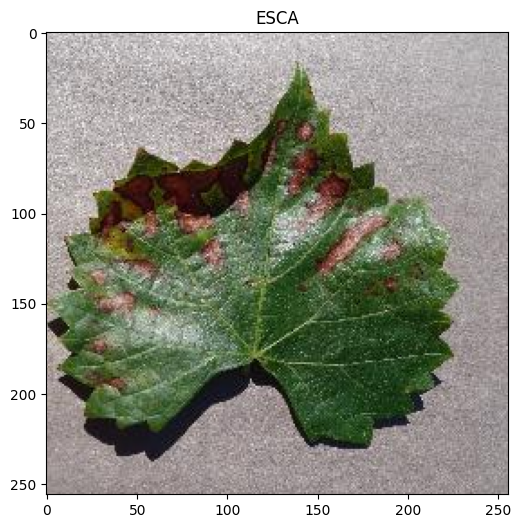

In [16]:
plt.figure(figsize=(6,6))
idi=np.random.randint(0, train.shape[0])
img=Image.open(train.loc[idi, "Image"])
plt.imshow(img)
plt.title(train.loc[idi, "Y"])
plt.show()

In [17]:
import keras

## ImageDataGenerator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
dev_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

test_generator = ImageDataGenerator(rescale=1./255)

### **flow from dataframe**

## **train**

In [20]:
train_images = dev_generator.flow_from_dataframe(
    train,
    x_col='Image',
    y_col='Y',
    target_size=(100, 100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 7222 validated image filenames belonging to 4 classes.


### **test**

In [21]:
test_images = test_generator.flow_from_dataframe(
    test,
    x_col='Image',
    y_col='Y',
    target_size=(100, 100),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False,
    seed=42,
)

Found 1805 validated image filenames.


In [22]:
labels=train_images.class_indices
labels

{'Black Rot': 0, 'ESCA': 1, 'Healthy': 2, 'Leaf Blight': 3}

## ResNet50V2 Model for Image Classification

The following code demonstrates the implementation of a ResNet50V2 model for image classification using Keras.

The ResNet50V2 model is pre-trained on the ImageNet dataset and is used as a feature extractor.

### Code Explanation


1. **Importing Dependencies:** We begin by importing the necessary dependencies, including the MobileNet model from Keras, as well as other required layers and callbacks.


In [23]:
from tensorflow.keras.applications import VGG16 , ResNet50V2
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop , Adam

2. **Defining Input Shape and Base Model:**

We define the desired input image size (150x150x3) and initialize the ResNet50V2 model as the base model.
​



In [24]:
# Load the pre-trained VGG16 model without the top layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. **Freezing Base Model Layers:**

We freeze the base model layers to prevent their weights from being updated during training. This is beneficial when dealing with limited training data to avoid overfitting and leverage the pre-trained weights.
​

In [25]:
# Freeze base model layers
base_model.trainable = False

4. **Building the Model Architecture:**

A sequential model is created. The base ResNet50V2 model is added as the first layer. Global average pooling is applied to reduce the spatial dimensions of the output. Dropout layers are introduced to mitigate overfitting. Two dense layers with ReLU activation are added, followed by a final dense layer with softmax activation for multi-class classification.




In [26]:
model=Sequential()

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout
)
from tensorflow.keras.models import Sequential

base_model = ResNet50V2(
    weights="imagenet",
    include_top=False,
    input_shape=(100, 100, 3)
)
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 4, 4, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,746,244 (94.40 MB)

 Trainable params: 1,181,444 (4.51 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

5. **Compiling the Model:**

We compile the model by specifying the loss function, optimizer, and evaluation metrics. In this case, we use categorical cross-entropy as the loss function, the Adam optimizer, and track accuracy and mean squared error as evaluation metrics.

In [28]:

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc', 'mse'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 4, 4, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,746,244 (94.40 MB)

 Trainable params: 1,181,444 (4.51 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

## Model fitting

6. **Training the Model:** We fit the model to the training data (`train_images`)using the provided training parameters. The batch size is set to 32,

In [29]:
history = model.fit(train_images, epochs=35,batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 1463s 6s/step - acc: 0.7303 - loss: 0.7108 - mse: 0.0957
Epoch 2/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - acc: 0.8566 - loss: 0.3506 - mse: 0.0506
Epoch 3/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - acc: 0.8818 - loss: 0.3011 - mse: 0.0442
Epoch 4/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - acc: 0.8805 - loss: 0.3012 - mse: 0.0431
Epoch 5/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - acc: 0.8852 - loss: 0.2789 - mse: 0.0405
Epoch 6/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - acc: 0.8920 - loss: 0.2611 - mse: 0.0382
Epoch 7/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - acc: 0.8933 - loss: 0.2550 - mse: 0.0375
Epoch 8/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - acc: 0.8818 - loss: 0.2910 - mse: 0.0430
Epoch 9/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - acc: 0.8952 - loss: 0.2515 - mse: 0.0373
Epoch 10/35
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - acc: 0.9047 - loss: 0.2367 - mse: 0.0350
Epoch 11/35
226/226 ━━━━━━━━━━━━━━━━━━

## Training and Validation Metrics Visualization

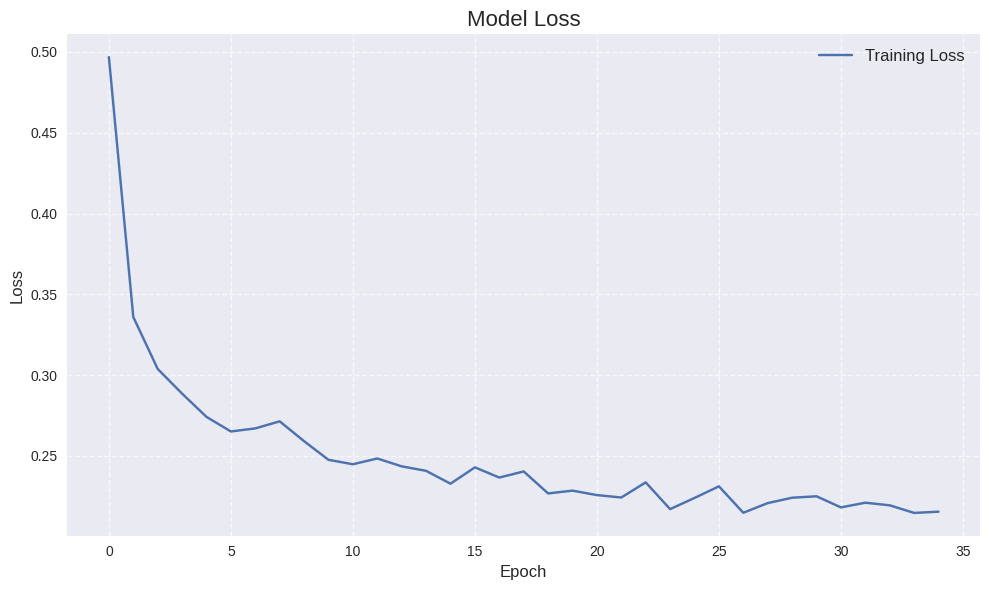

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


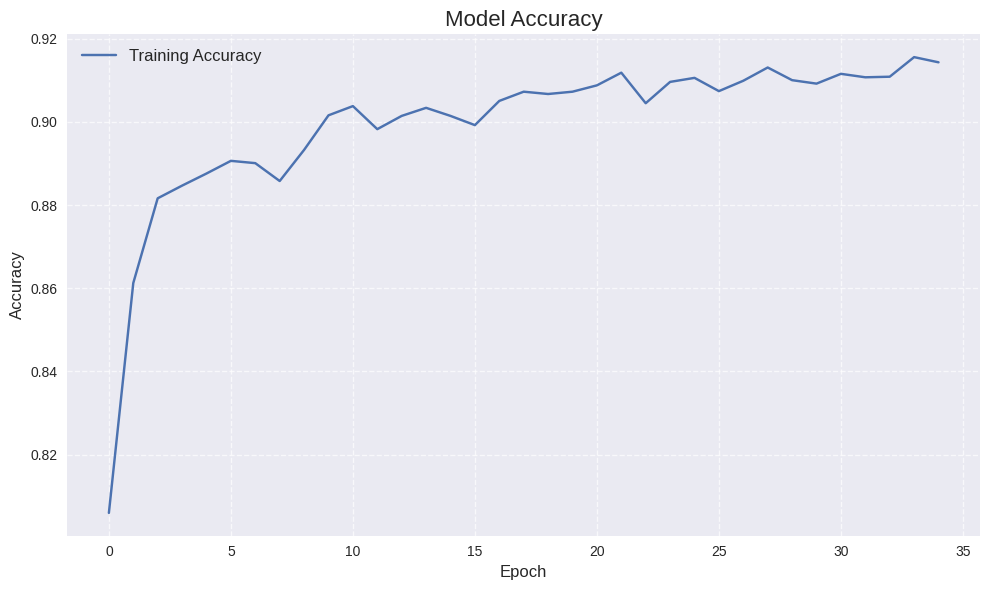

In [31]:
# Plot model accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## model prediction and evaluation

In [32]:
labels=train_images.class_indices
labels

{'Black Rot': 0, 'ESCA': 1, 'Healthy': 2, 'Leaf Blight': 3}

## PREDICTION

In [33]:
img_pred=model.predict(test_images)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 481s 9s/step


In [ ]:
image_pred=np.argmax(img_pred, axis=1)

In [ ]:
image_pred.shape

In [ ]:
Y_test=test["Y"].values

In [ ]:
labels = dict((v, k) for k, v in labels.items())
y_pred = [labels.get(k, "Unknown") for k in image_pred]


In [38]:
labels

{0: 'Black Rot', 1: 'ESCA', 2: 'Healthy', 3: 'Leaf Blight'}

## Visualizing Predicted Labels  

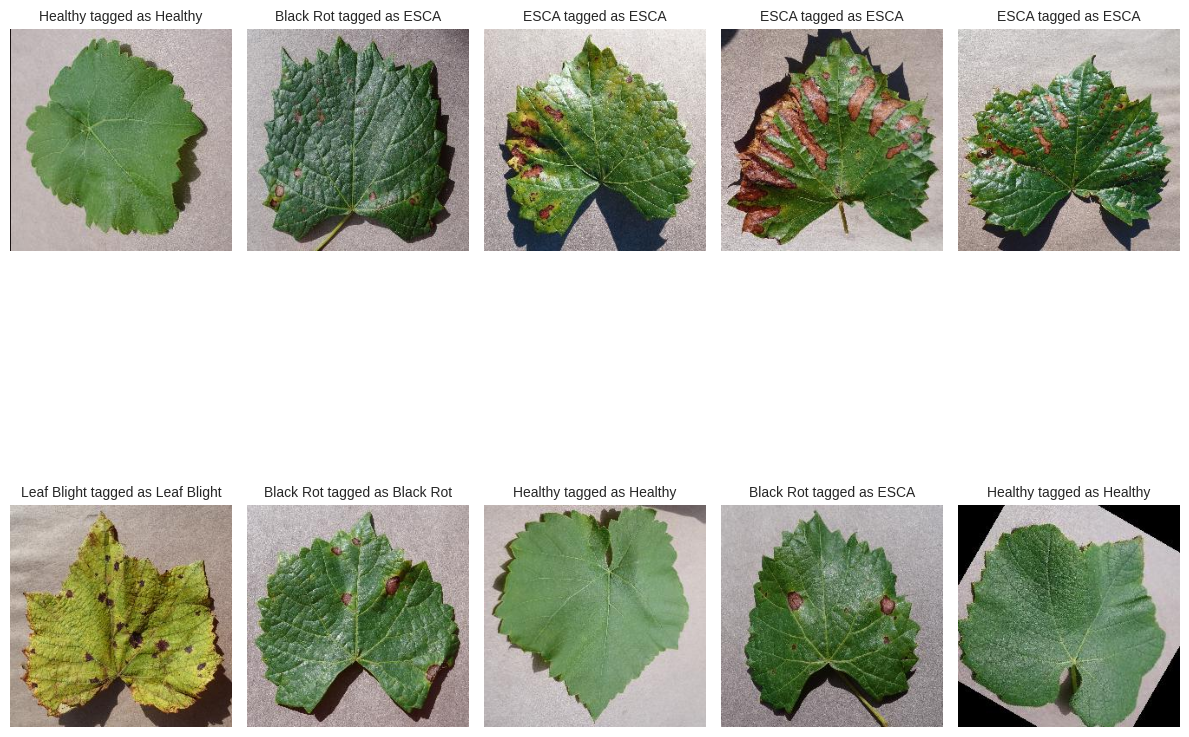

In [39]:
plt.figure(figsize=(12, 12))

# Generate random indices for ten images
random_indices = np.random.randint(0, test.shape[0], size=10)

for i, index in enumerate(random_indices):
    img = Image.open(test.loc[index, "Image"])
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(Y_test[index] + " tagged as " + y_pred[index], fontsize=10)
    plt.axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between subplots
plt.xticks(rotation='vertical')  # Rotate x-axis tick labels vertically
plt.tight_layout()  # Automatically adjust subplot parameters to prevent overlapping
plt.show()

## accuracy evaluation

In [40]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:
accuracy_score(y_pred, Y_test)

0.9263157894736842

In [42]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

   Black Rot       0.89      0.84      0.86       472
        ESCA       0.87      0.90      0.89       480
     Healthy       0.97      1.00      0.98       423
 Leaf Blight       0.99      0.97      0.98       430

    accuracy                           0.93      1805
   macro avg       0.93      0.93      0.93      1805
weighted avg       0.93      0.93      0.93      1805



## confusion matrix

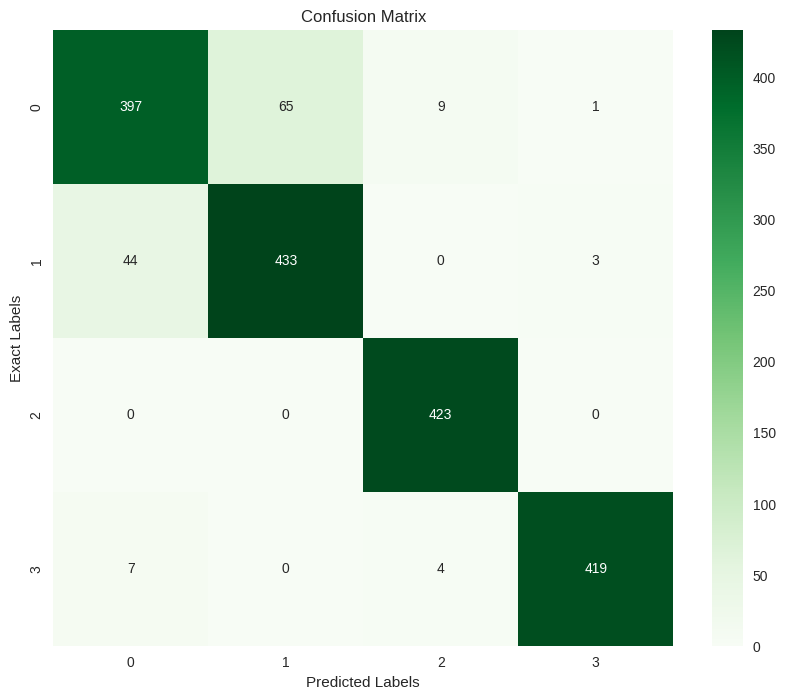

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.show()